In [ ]:
import torch
import matplotlib.pyplot as plt

from gnn.src.data.dataset import InMemoQM9Dataset
from gnn.src.train.trainer import Trainer

from gnn.src.nn.schnet import SchNet
from torch.optim import Adam
from torch.optim.lr_scheduler import ExponentialLR
from gnn.src.data.utils import get_property

In [ ]:
dataset = InMemoQM9Dataset('./records')

In [ ]:
trainer = Trainer(
    dataset=dataset,
    device='cuda',
    validation_split = 0.1,
    shuffle_dataset = True,
    dataset_size=len(dataset)
)

In [ ]:
model=SchNet(n_interactions=3, n_features=64, n_filters=64)
loss_function=torch.nn.MSELoss()
optimizer=Adam(model.parameters(), lr=10e-6)
scheduler = ExponentialLR(optimizer, gamma=0.9)

losses_train_mean, losses_val_mean = trainer.train(
    model=model,
    loss_function=loss_function,
    optimizer=optimizer,
    scheduler=scheduler,
    max_epochs=100,
    models_dir='./models',
    checkpoint_frequency=10,
    property='U0',
    map_property=lambda t: get_property(t, "U0"),
    aggregate_outputs=lambda outputs: torch.sum(outputs)
)

### loss

<details>
  <summary>losses_train_mean</summary>
  [62.01720274369426, 3.855664905795706, 1.470744270031059, 0.48724837184166303, 0.2185091755438258, 0.12970770275473292, 0.09118550022045106, 0.06608583761183966, 0.04866483769252855, 0.03629720696217121, 0.027682739715482855, 0.022441778513529412, 0.01851948604798977, 0.01551005896969799, 0.013235842671422532, 0.011477231114411648, 0.010011776838817184, 0.008768613087820466, 0.007820951045846127, 0.006861119723031787, 0.005997588216345162, 0.005429441674484942, 0.004997433901509503, 0.00458054748343199, 0.0042289500608223, 0.003886832497196267, 0.0036597775333455677, 0.003389550331692726, 0.003146876301677876, 0.003007448610409635, 0.0026444127755532996, 0.0024814319811052614, 0.0023722484994161642, 0.002217274152561548, 0.00211287973846941, 0.0020086719327619376, 0.0019335964680079365, 0.001829466990829952, 0.0017453218102550746, 0.001697430742707213, 0.0015221085058495462, 0.0014616037920220546, 0.001415947265645204, 0.0013439486454040772, 0.001321042725326566, 0.0012714819772154094, 0.001212845649980328, 0.001180486795877491, 0.0011423404905775874, 0.0011090461541399758, 0.0009859634540501136, 0.0009713234759581791, 0.0009385015870230978, 0.000915340180822165, 0.0008908553472200813, 0.0008634173159925479, 0.0008517514352225984, 0.0008314447782446275, 0.0008012538050291427, 0.000789616098476114, 0.000706790270242097, 0.0006997971386365314, 0.0006849693654691886, 0.0006796789657292262, 0.0006721092628550239, 0.0006579365911963997, 0.0006381737587977139, 0.00062183882877528, 0.0006196750734655334, 0.0005920366379824512, 0.0005455295870874468, 0.0005355987828181769, 0.0005350809273369341, 0.0005260914285356945, 0.0005144322498082179, 0.0005097554196391226, 0.0004944138218436799, 0.0004957607411883612, 0.00048731296617919925, 0.00047085622259016, 0.00043247478937052003, 0.0004326227631906005, 0.0004230504851676119, 0.00041980875946808876, 0.0004118129167490692, 0.00040667342307551676, 0.00040852384102420735, 0.0003976235933464836, 0.00038898675990116474, 0.0003899732768964404, 0.00035550602013247154, 0.0003469703338366511, 0.000348525508643403, 0.0003408790085404445, 0.0003445966650621731, 0.00033513601922740584, 0.0003330226977757432, 0.000329319863655587, 0.0003252378650060659, 0.0003236456382536546]
</details>


<details>
  <summary>losses_val_mean</summary>
  [5.235490518081, 2.3461413623542047, 0.6987852133255525, 0.25375190216889465, 0.12975388601271912, 0.08333827424703028, 0.060037470954059355, 0.04655901447091277, 0.030709831095516265, 0.021590768583265, 0.026601613023407952, 0.020027483990762707, 0.011802554458023855, 0.02598216505427234, 0.0069322648501009875, 0.011389874253154688, 0.00715995368495982, 0.00790888206625075, 0.007011374552132607, 0.0034173859766230773, 0.0028724476947870146, 0.0039935683610609505, 0.0028925144523359926, 0.0038359056624676004, 0.0025142951530049197, 0.0019055827997829671, 0.0020212599184826125, 0.002024644842291485, 0.007745259689397885, 0.00191251397124665, 0.0010523516828632375, 0.0010702953007344067, 0.0020205285372326613, 0.009020103005275535, 0.0008832290048823974, 0.0010738536396852302, 0.0010275232748301409, 0.000765740579479155, 0.0009996956927096068, 0.0010253965617448991, 0.000824769860464862, 0.0012266000794482754, 0.0005467807259823134, 0.002649027633160455, 0.0009502434484415899, 0.0015271164113740555, 0.0025332589653021625, 0.000667498887566366, 0.0023692757179562007, 0.000492405275632882, 0.0006723674997160183, 0.00040730102107926095, 0.001034242544112566, 0.00039185854883195035, 0.0005667559906551217, 0.007672396105200274, 0.00029223257606516005, 0.0002929943237867744, 0.0006468446536266785, 0.0005778725241006343, 0.00025590287314006943, 0.0003776287818142506, 0.0002697083567682913, 0.00037130908739114744, 0.0007920529181805495, 0.00024817039779151455, 0.0003540491828611324, 0.0006762124812756372, 0.0004064230151210272, 0.0003280262604931385, 0.00018789024927581304, 0.001213776537343528, 0.00027052373942723743, 0.0005245428696212984, 0.0001837372502651119, 0.0002771537435431093, 0.0004180265411292571, 0.0004938195566506235, 0.00028633674756521686, 0.00024044108368519808, 0.00020387112650650764, 0.00024997403320852494, 0.00031200240467619937, 0.0001721892608240612, 0.00016923376861158318, 0.0001650277709325874, 0.00021492506695480268, 0.000390210041389802, 0.000158262203210238, 0.00031326762106033635, 0.0004437115012268358, 0.00015814948674961412, 0.0004029103955279002, 0.00013144237604717079, 0.0008774152971664457, 0.00016895622718430362, 0.00014735256132235948, 0.00029296558284204065, 0.0011845317741914134, 0.00016919059252624088]
</details>

In [ ]:
losses_train_mean_MSE_Ha = [62.01720274369426, 3.855664905795706, 1.470744270031059, 0.48724837184166303, 0.2185091755438258, 0.12970770275473292, 0.09118550022045106, 0.06608583761183966, 0.04866483769252855, 0.03629720696217121, 0.027682739715482855, 0.022441778513529412, 0.01851948604798977, 0.01551005896969799, 0.013235842671422532, 0.011477231114411648, 0.010011776838817184, 0.008768613087820466, 0.007820951045846127, 0.006861119723031787, 0.005997588216345162, 0.005429441674484942, 0.004997433901509503, 0.00458054748343199, 0.0042289500608223, 0.003886832497196267, 0.0036597775333455677, 0.003389550331692726, 0.003146876301677876, 0.003007448610409635, 0.0026444127755532996, 0.0024814319811052614, 0.0023722484994161642, 0.002217274152561548, 0.00211287973846941, 0.0020086719327619376, 0.0019335964680079365, 0.001829466990829952, 0.0017453218102550746, 0.001697430742707213, 0.0015221085058495462, 0.0014616037920220546, 0.001415947265645204, 0.0013439486454040772, 0.001321042725326566, 0.0012714819772154094, 0.001212845649980328, 0.001180486795877491, 0.0011423404905775874, 0.0011090461541399758, 0.0009859634540501136, 0.0009713234759581791, 0.0009385015870230978, 0.000915340180822165, 0.0008908553472200813, 0.0008634173159925479, 0.0008517514352225984, 0.0008314447782446275, 0.0008012538050291427, 0.000789616098476114, 0.000706790270242097, 0.0006997971386365314, 0.0006849693654691886, 0.0006796789657292262, 0.0006721092628550239, 0.0006579365911963997, 0.0006381737587977139, 0.00062183882877528, 0.0006196750734655334, 0.0005920366379824512, 0.0005455295870874468, 0.0005355987828181769, 0.0005350809273369341, 0.0005260914285356945, 0.0005144322498082179, 0.0005097554196391226, 0.0004944138218436799, 0.0004957607411883612, 0.00048731296617919925, 0.00047085622259016, 0.00043247478937052003, 0.0004326227631906005, 0.0004230504851676119, 0.00041980875946808876, 0.0004118129167490692, 0.00040667342307551676, 0.00040852384102420735, 0.0003976235933464836, 0.00038898675990116474, 0.0003899732768964404, 0.00035550602013247154, 0.0003469703338366511, 0.000348525508643403, 0.0003408790085404445, 0.0003445966650621731, 0.00033513601922740584, 0.0003330226977757432, 0.000329319863655587, 0.0003252378650060659, 0.0003236456382536546]
losses_val_mean_MSE_Ha = [5.235490518081, 2.3461413623542047, 0.6987852133255525, 0.25375190216889465, 0.12975388601271912, 0.08333827424703028, 0.060037470954059355, 0.04655901447091277, 0.030709831095516265, 0.021590768583265, 0.026601613023407952, 0.020027483990762707, 0.011802554458023855, 0.02598216505427234, 0.0069322648501009875, 0.011389874253154688, 0.00715995368495982, 0.00790888206625075, 0.007011374552132607, 0.0034173859766230773, 0.0028724476947870146, 0.0039935683610609505, 0.0028925144523359926, 0.0038359056624676004, 0.0025142951530049197, 0.0019055827997829671, 0.0020212599184826125, 0.002024644842291485, 0.007745259689397885, 0.00191251397124665, 0.0010523516828632375, 0.0010702953007344067, 0.0020205285372326613, 0.009020103005275535, 0.0008832290048823974, 0.0010738536396852302, 0.0010275232748301409, 0.000765740579479155, 0.0009996956927096068, 0.0010253965617448991, 0.000824769860464862, 0.0012266000794482754, 0.0005467807259823134, 0.002649027633160455, 0.0009502434484415899, 0.0015271164113740555, 0.0025332589653021625, 0.000667498887566366, 0.0023692757179562007, 0.000492405275632882, 0.0006723674997160183, 0.00040730102107926095, 0.001034242544112566, 0.00039185854883195035, 0.0005667559906551217, 0.007672396105200274, 0.00029223257606516005, 0.0002929943237867744, 0.0006468446536266785, 0.0005778725241006343, 0.00025590287314006943, 0.0003776287818142506, 0.0002697083567682913, 0.00037130908739114744, 0.0007920529181805495, 0.00024817039779151455, 0.0003540491828611324, 0.0006762124812756372, 0.0004064230151210272, 0.0003280262604931385, 0.00018789024927581304, 0.001213776537343528, 0.00027052373942723743, 0.0005245428696212984, 0.0001837372502651119, 0.0002771537435431093, 0.0004180265411292571, 0.0004938195566506235, 0.00028633674756521686, 0.00024044108368519808, 0.00020387112650650764, 0.00024997403320852494, 0.00031200240467619937, 0.0001721892608240612, 0.00016923376861158318, 0.0001650277709325874, 0.00021492506695480268, 0.000390210041389802, 0.000158262203210238, 0.00031326762106033635, 0.0004437115012268358, 0.00015814948674961412, 0.0004029103955279002, 0.00013144237604717079, 0.0008774152971664457, 0.00016895622718430362, 0.00014735256132235948, 0.00029296558284204065, 0.0011845317741914134, 0.00016919059252624088]

losses_train_mean_RMSE_eV = list(map(lambda x: (x*27.21)**0.5, losses_train_mean_MSE_Ha))
losses_val_mean_RMSE_eV = list(map(lambda x: (x*27.21)**0.5, losses_val_mean_MSE_Ha))

fig, axs = plt.subplots(nrows=2)
plt.tight_layout()
axs[0].plot(range(100), losses_train_mean_RMSE_eV, c='g')
axs[0].plot(range(100), losses_val_mean_RMSE_eV, c='b')
axs[0].legend (('Обучение', 'Валидация'))
axs[0].set(xlabel='Число эпох', ylabel='RMSE U0, эВ')
axs[1].plot(range(10, 100), losses_train_mean_RMSE_eV[10:100], c='g')
axs[1].plot(range(10, 100), losses_val_mean_RMSE_eV[10:100], c='b')
axs[1].legend (('Обучение', 'Валидация'))
axs[1].set(xlabel='Число эпох', ylabel='RMSE U0, эВ')
print(losses_val_mean_RMSE_eV[-1])
plt.show()

0.06785039441771148

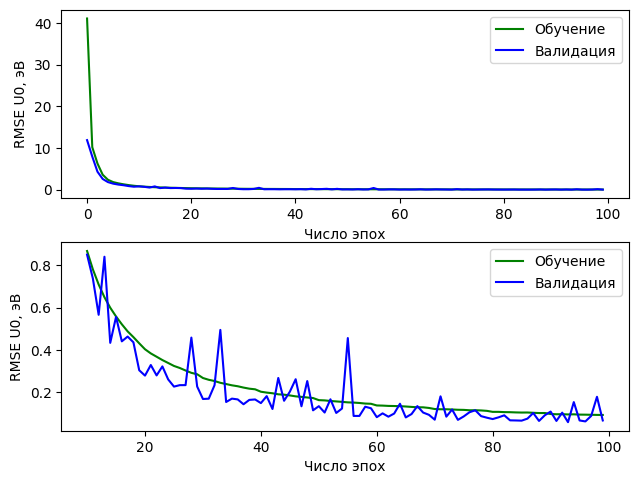